# Creating combined AGAGE files

Before you run this tutorial, make sure you've run the setup script to create your config file.

In [1]:
from agage_archive.io import read_agage, combine_datasets, read_ale_gage, output_dataset, Paths

paths = Paths()

To read AGAGE netCDF files, use the read_agage function. E.g.:

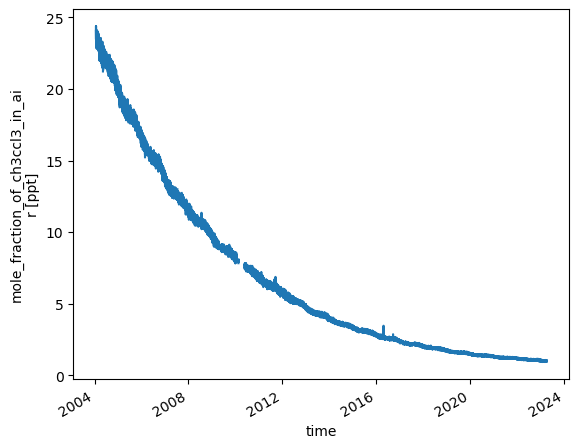

In [2]:
ds_agage = read_agage("CH3CCl3", "CGO", "GCMS-Medusa")
ds_agage.mf.plot()

Similarly, ALE or GAGE data can be read using:

In [3]:
ds_gage = read_ale_gage("CH3CCl3", "CGO", "GAGE")

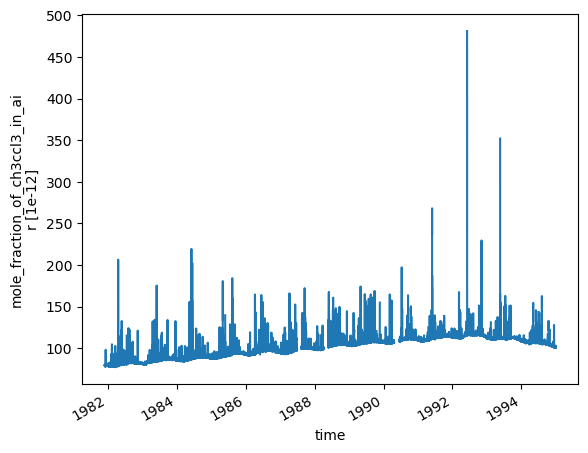

In [4]:
ds_gage.mf.plot()

The ```combine_datasets``` function calls these functions, based on the order in which they are specified in ```data/data_selector.json```.

Here, we will create a CH3CCl3 timeseries from CGO ALE, GAGE, GCMD and Medusa data:

In [5]:
ds = combine_datasets("CH3CCl3", "CGO", scale="SIO-05")

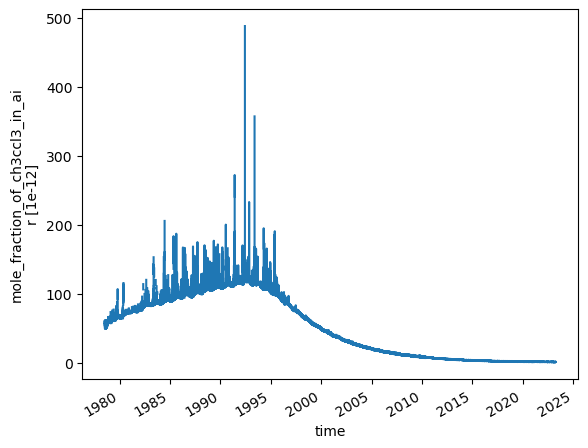

In [6]:
ds.mf.plot()

To output the file to the output directory, use the ```output_dataset``` function:

In [7]:
output_dataset(ds)